In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Single Linear Regression


- Conceptual understanding
- Mathematical formulation
- Manual implementation in Python (from scratch)
- Using `sklearn` for Linear Regression
- Visualization and evaluation of the results

We'll use a small synthetic dataset for maximum clarity and understanding.



## What is Linear Regression?
Linear Regression is a **supervised learning algorithm** used for **predicting a continuous output** based on one or more input features.

- When there's **one input variable**, it's called **Simple Linear Regression**.
- When there are **multiple input variables**, it's called **Multiple Linear Regression**.

The goal is to fit a line (or hyperplane) that minimizes the error between actual and predicted values.


## Mathematical Formulation



For **Simple Linear Regression** with one feature `x` and target `y`, the model is:


$$
y = wx + b
$$

Where:
- $x$ : Input feature  
- $y$ : Target output  
- $w$ : Weight (slope)  
- $b$ : Bias (intercept)

We aim to learn parameters $w$ and $b$ that minimize prediction error.

The **loss function** (Mean Squared Error):

$$
J(w, b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (w x_i + b))^2
$$

And use the true underlying function:

$$
y = 3x + 4 + \text{noise}
$$

This will help us test if our model can correctly recover the coefficients.


In [ ]:
# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 3 * X + 4 + np.random.randn(100, 1)

In [ ]:
# Convert to DataFrame
data = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})
data

,X,y
0,0.749080,6.334288
1,1.901429,9.405278
2,1.463988,8.483724
3,1.197317,5.604382
4,0.312037,4.716440
...,...,...
95,0.987591,6.146963
96,1.045466,7.059295
97,0.855082,6.906398
98,0.050838,4.429206


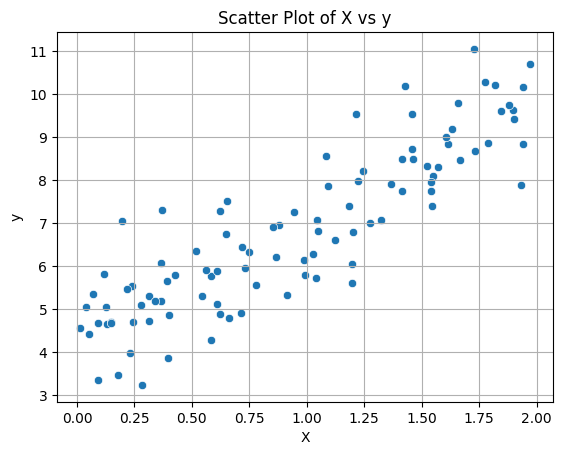

In [ ]:
# Visualize the dataset
sns.scatterplot(x='X', y='y', data=data)
plt.title("Scatter Plot of X vs y")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

## Manual Linear Regression (from Scratch)



We use the **closed-form solution** of OLS to estimate parameters:

$$
w = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
$$

$$
b = \bar{y} - w \bar{x}
$$



In [ ]:
# Manual calculation of weight and bias
x_mean = X.mean()
y_mean = y.mean()

numerator = np.sum((X - x_mean) * (y - y_mean))
denominator = np.sum((X - x_mean)**2)

w = numerator / denominator
b = y_mean - w * x_mean

print(f"Estimated Weight (w): {w:.4f}")
print(f"Estimated Bias (b): {b:.4f}")

Estimated Weight (w): 2.7701
Estimated Bias (b): 4.2151


In [ ]:
# Predict manually
y_pred_manual = w * X + b

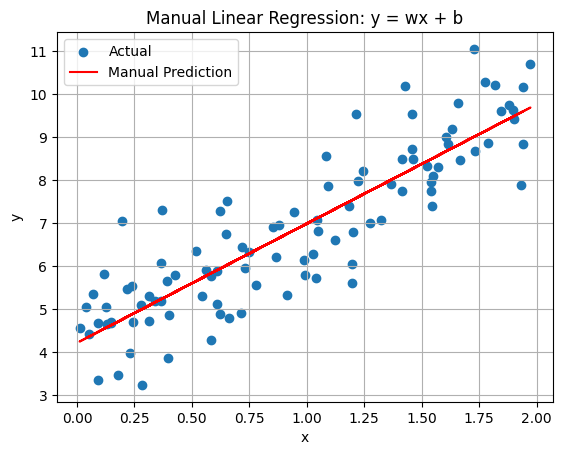

In [ ]:
#Plot
plt.scatter(X, y, label="Actual")
plt.plot(X, y_pred_manual, color='red', label="Manual Prediction")
plt.title("Manual Linear Regression: y = wx + b")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


## Linear Regression using Scikit-Learn



Now let's fit the same data using `LinearRegression` from `sklearn`.


In [ ]:
# Fit model
model = LinearRegression()
model.fit(X, y)

print(f"Sklearn Weight (w): {model.coef_[0][0]:.4f}")
print(f"Sklearn Bias (b): {model.intercept_[0]:.4f}")

# Predict
y_pred_sklearn = model.predict(X)

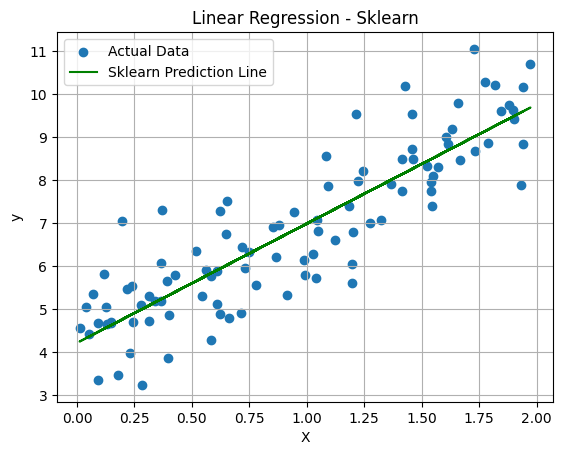

In [ ]:
# Plot
plt.scatter(X, y, label="Actual Data")
plt.plot(X, y_pred_sklearn, color='green', label="Sklearn Prediction Line")
plt.title("Linear Regression - Sklearn")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

### Evaluation Metrics

We evaluate the model using:

- Mean Squared Error (MSE)


In [ ]:
mse = mean_squared_error(y, y_pred_sklearn)

print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 82.6811


# Multiple Linear Regression



When we have **more than one input feature** (e.g., $ x_1, x_2 $), the Linear Regression model becomes:

$$
y = w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b
$$

In matrix form:

$$
\mathbf{y} = \mathbf{X} \cdot \mathbf{w} + b
$$

We can estimate parameters either:
- **Manually** using vectorized OLS
- **Using `sklearn`**


### Generate Synthetic Data with Two Features

We'll create two input features:
- $ x_1 \sim U(0, 2) $
- $ x_2 \sim U(0, 3) $

And use the true underlying function:

$$
y = 3x_1 + 5x_2 + 4 + \text{noise}
$$

This will help us test if our model can correctly recover the coefficients.


In [ ]:
# Create multiple features (x1, x2) and output y
np.random.seed(0)
x1 = 2 * np.random.rand(100, 1)
x2 = 3 * np.random.rand(100, 1)
b_true = 4
w1_true = 3
w2_true = 5

In [ ]:
# y = w1*x1 + w2*x2 + b + noise
y = w1_true * x1 + w2_true * x2 + b_true + np.random.randn(100, 1)

In [ ]:
# Combine features into single array
X_multi = np.hstack([x1, x2])
df_multi = pd.DataFrame({'x1': x1.flatten(), 'x2': x2.flatten(), 'y': y.flatten()})
df_multi

,x1,x2,y
0,1.097627,2.033450,18.586765
1,1.430379,0.810024,11.261324
2,1.205527,2.205582,17.497022
3,1.089766,2.886566,21.264307
4,0.847310,0.746259,9.775193
...,...,...,...
95,0.366383,1.471376,11.880242
96,1.173026,0.682244,11.072250
97,0.040215,0.763069,7.616664
98,1.657880,0.174087,10.535616


## Solve Using the Normal Equation (Manually OLS)



We want to solve for:

$$
\theta = \begin{bmatrix} b \\\\ w_1 \\\\ w_2 \end{bmatrix}
= (X^T X)^{-1} X^T y
$$

We first add a bias column (ones) to the input matrix. This makes the math include $ b $ automatically.

In [ ]:
# Add column of 1s for bias term
X_b_multi = np.c_[np.ones((100, 1)), X_multi]  # Shape: (100, 3)

# Normal Equation: w = (XᵀX)⁻¹ Xᵀy
theta_multi = np.linalg.inv(X_b_multi.T.dot(X_b_multi)).dot(X_b_multi.T).dot(y)

b_manual = theta_multi[0][0]
w_manual = theta_multi[1:].flatten()

print(f"Bias (b): {b_manual:.4f}")
print(f"Weights: w1 = {w_manual[0]:.4f}, w2 = {w_manual[1]:.4f}")

Bias (b): 4.3073
Weights: w1 = 2.7242, w2 = 4.9137


## Use Scikit-Learn's LinearRegression to Fit the Same Data



We now use `sklearn.linear_model.LinearRegression` to fit the model and compare its learned parameters with our manual solution.


In [ ]:
# Fit model using sklearn
model_multi = LinearRegression()
model_multi.fit(X_multi, y)

print(f"Sklearn Bias (b): {model_multi.intercept_[0]:.4f}")
print(f"Sklearn Weights: w1 = {model_multi.coef_[0][0]:.4f}, w2 = {model_multi.coef_[0][1]:.4f}")

Sklearn Bias (b): 4.3073
Sklearn Weights: w1 = 2.7242, w2 = 4.9137


## Evaluate the Model



We compute:
- Mean Squared Error (MSE): measures average squared error

We do this to check how well our model fits the data.

In [ ]:
y_pred_multi = model_multi.predict(X_multi)

mse_multi = mean_squared_error(y, y_pred_multi)

print(f"Mean Squared Error: {mse_multi:.4f}")

Mean Squared Error: 0.8316


# Polynomial Regression



**Polynomial Regression** is a way to model non-linear relationships using a linear model by transforming input features.

We extend linear regression like this:

$$
y = w_1 x + w_2 x^2 + w_3 x^3 + \dots + w_n x^n + b
$$

We'll start by modeling a simple quadratic relationship (degree 2).

## Generate Non-Linear Data



We'll generate a synthetic dataset using a quadratic equation:

$$
y = 1 + 0.5x + 1.2x^2 + \text{noise}
$$

This will be useful to test whether polynomial regression can learn the underlying curved relationship.

In [ ]:
# Generate non-linear data
np.random.seed(0)
X_poly = 6 * np.random.rand(100, 1) - 3
y_poly = 1 + 0.5 * X_poly + 1.2 * X_poly**2 + np.random.randn(100, 1)

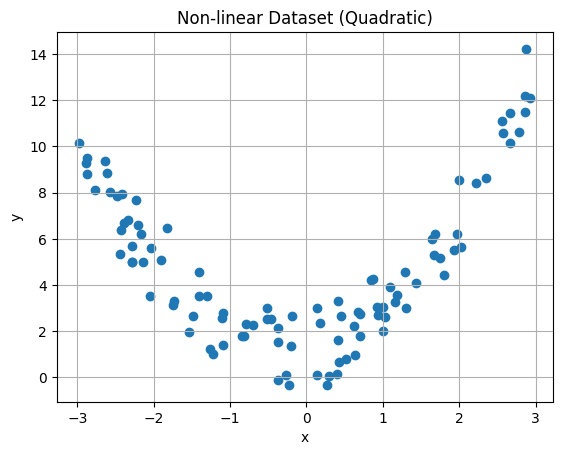

In [ ]:
#Plot
plt.scatter(X_poly, y_poly)
plt.title("Non-linear Dataset (Quadratic)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

## Manually Add Polynomial Features



We now manually add a new feature $ x^2 $ to our dataset.

So the model becomes:

$$
y = w_1 x + w_2 x^2 + b
$$

We'll then use the closed-form OLS solution to compute $ w_1 $, $ w_2 $, and $ b $.

In [ ]:
# Manually add x^2 as new feature
X_poly_manual = np.hstack((X_poly, X_poly**2))
X_b_poly = np.c_[np.ones((100, 1)), X_poly_manual]

## Closed-Form OLS Solution for Polynomial Regression



Even though we're modeling a **non-linear relationship**, the key idea is that **Polynomial Regression is still linear in parameters**:

$$
y = w_1 x + w_2 x^2 + b
$$

We can rewrite this as a **linear regression problem** using transformed features:

Let:

- $ z_1 = x $  
- $ z_2 = x^2 $  
- Then:  
  $ y = w_1 z_1 + w_2 z_2 + b $

Now it becomes a regular linear regression model in terms of \( z \):

$$
\mathbf{y} = \mathbf{Z} \cdot \mathbf{w} + b
$$

Where:

- $ \mathbf{Z} $ is the matrix of transformed features with a column of 1s added for bias term
- $ \mathbf{w} $ contains $ [b, w_1, w_2] $

We solve this using the **normal equation**:

$$
\theta = (Z^T Z)^{-1} Z^T y
$$

Where $ \theta $ is a vector containing: $ [b, w_1, w_2] $

We apply this to our transformed matrix and target vector to compute parameters manually.


In [ ]:
# Closed-form solution
theta_poly = np.linalg.inv(X_b_poly.T.dot(X_b_poly)).dot(X_b_poly.T).dot(y_poly)

b_poly = theta_poly[0][0]
w1_poly = theta_poly[1][0]
w2_poly = theta_poly[2][0]

print(f"Bias (b): {b_poly:.4f}")
print(f"Weights: w1 = {w1_poly:.4f}, w2 = {w2_poly:.4f}")

Bias (b): 1.3405
Weights: w1 = 0.4791, w2 = 1.1498


## Predict and Visualize the Manual Polynomial Fit



We now use the learned weights to make predictions on a smooth range of `x` values and visualize the fitted curve.

This helps us verify whether the model captured the curvature in the data.


In [ ]:
# Predict using manual model
x_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
x_plot_ext = np.hstack((x_plot, x_plot**2))
x_plot_b = np.c_[np.ones((100, 1)), x_plot_ext]

y_pred_plot = x_plot_b.dot(theta_poly)

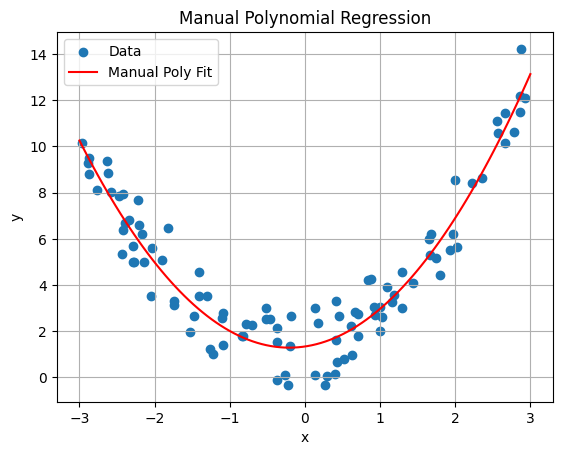

In [ ]:
#Plot
plt.scatter(X_poly, y_poly, label='Data')
plt.plot(x_plot, y_pred_plot, color='red', label='Manual Poly Fit')
plt.title("Manual Polynomial Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## Use Scikit-Learn to Automatically Add Polynomial Features



We'll now use `PolynomialFeatures` from `sklearn.preprocessing` to generate $ x $ and $ x^2 $ automatically.

Then, we'll fit the model using `LinearRegression` as usual.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features (degree 2)
poly_feat = PolynomialFeatures(degree=2, include_bias=False)
X_poly_sklearn = poly_feat.fit_transform(X_poly)

# Fit model
model_poly = LinearRegression()
model_poly.fit(X_poly_sklearn, y_poly)

print(f"Bias (b): {model_poly.intercept_[0]:.4f}")
print(f"Weights: {model_poly.coef_[0]}")

Bias (b): 1.3405
Weights: [0.47906552 1.14978823]


## Predict and Plot Sklearn Polynomial Regression



We now use the model from `sklearn` to predict values and plot them.

This helps us visually confirm the quality of the regression.


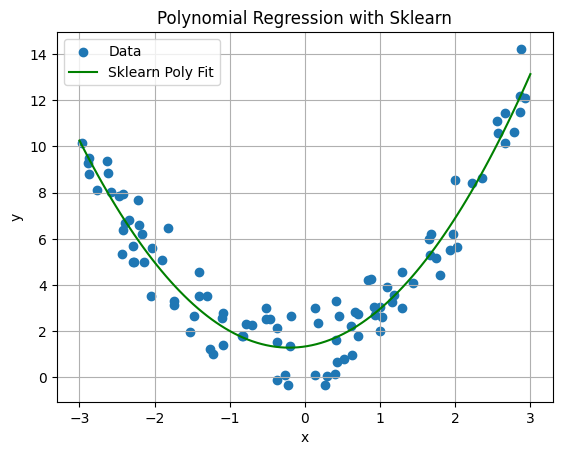

In [ ]:
# Predict using sklearn model
x_plot_poly = poly_feat.transform(x_plot)
y_pred_sklearn_poly = model_poly.predict(x_plot_poly)

plt.scatter(X_poly, y_poly, label='Data')
plt.plot(x_plot, y_pred_sklearn_poly, color='green', label='Sklearn Poly Fit')
plt.title("Polynomial Regression with Sklearn")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## Evaluate the Polynomial Regression Models



To assess how well each model fits the data, we use:

- **Mean Squared Error (MSE)** — lower is better

We'll evaluate both:
- The **manual** polynomial regression
- The **scikit-learn** polynomial regression

In [ ]:
# Predict manually on training data
y_pred_manual_train = X_b_poly.dot(theta_poly)

mse_manual = mean_squared_error(y_poly, y_pred_manual_train)

print("Manual Polynomial Regression Evaluation")
print(f"Mean Squared Error: {mse_manual:.4f}")

Manual Polynomial Regression Evaluation
Mean Squared Error: 0.9736
R² Score: 0.9119


In [ ]:
# Predict using sklearn model on training data
y_pred_sklearn_train = model_poly.predict(X_poly_sklearn)

mse_sklearn = mean_squared_error(y_poly, y_pred_sklearn_train)

print("Sklearn Polynomial Regression Evaluation")
print(f"Mean Squared Error: {mse_sklearn:.4f}")

Sklearn Polynomial Regression Evaluation
Mean Squared Error: 0.9736
R² Score: 0.9119
